# Analytics Avengers: Water Levels

In [31]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# File to Load
San_Francisco_path = Path("Data/Analytics_Avengers-SF_CA_Sea_Levels.csv")
San_Diego_path = Path("Data/Analytics_Avengers-San_Diego_CA_Sea_Levels.csv")
Key_West_path = Path("Data/Analytics_Avengers-Key_West_FL_Sea_Level.csv")
Honolulu_path = Path("Data/Analytics_Avengers-Honolulu_Hi_Sea_Levels.csv")
Charleston_path = Path("Data/Analytics_Avengers-Charleston_SC_Sea_Level.csv")
Boston_path = Path("Data/Analytics_Avengers-Boston_MA_Sea_Levels.csv")
Seattle_path = Path("Data/Analytics_Avengers-Seattle_WA_Sea_Level.csv")

# Read Data Files and store them into Pandas DataFrames
San_Francisco = pd.read_csv(San_Francisco_path)
San_Diego = pd.read_csv(San_Diego_path)
Key_West = pd.read_csv(Key_West_path)
Honolulu = pd.read_csv(Honolulu_path)
Charleston = pd.read_csv(Charleston_path)
Boston = pd.read_csv(Boston_path)
Seattle = pd.read_csv(Seattle_path)

# Display the first few rows of the San Francisco DataFrame
San_Francisco.head()


,City,Region,Date,Time (GMT),Highest,MHHW (ft),MHW (ft),MSL (ft),MTL (ft),MLW (ft),MLLW (ft),Lowest (ft),Inf
0,San Francisco,West,1/1/1923,0:00,5.923,5.142,4.532,2.514,2.554,0.562,-0.488,-1.675,0
1,San Francisco,West,2/1/1923,0:00,5.825,4.975,4.493,2.514,2.534,0.572,-0.235,-1.275,0
2,San Francisco,West,3/1/1923,0:00,5.723,4.512,4.204,2.203,2.213,0.224,-0.507,-1.177,0
3,San Francisco,West,4/1/1923,0:00,5.825,4.834,4.555,2.544,2.564,0.572,-0.215,-1.275,0
4,San Francisco,West,5/1/1923,0:00,6.123,4.844,4.384,2.354,2.393,0.395,-0.576,-2.177,0


In [ ]:
San_Diego.head()

In [ ]:
Key_West.head()

In [ ]:
Honolulu.head()

In [ ]:
Charleston.head()

In [ ]:
Boston.head()

In [ ]:
Seattle.head()

In [32]:
# List of file paths
file_paths = [
    "Data/Analytics_Avengers-SF_CA_Sea_Levels.csv",
    "Data/Analytics_Avengers-San_Diego_CA_Sea_Levels.csv",
    "Data/Analytics_Avengers-Key_West_FL_Sea_Level.csv",
    "Data/Analytics_Avengers-Honolulu_Hi_Sea_Levels.csv",
    "Data/Analytics_Avengers-Charleston_SC_Sea_Level.csv",
    "Data/Analytics_Avengers-Boston_MA_Sea_Levels.csv",
    "Data/Analytics_Avengers-Seattle_WA_Sea_Level.csv"
]

# Create an empty list to store DataFrames
dataframes = []

# Loop through the file paths and read each CSV file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames vertically into one
merged_data = pd.concat(dataframes, ignore_index=True)
merged_data

,City,Region,Date,Time (GMT),Highest,MHHW (ft),MHW (ft),MSL (ft),MTL (ft),MLW (ft),MLLW (ft),Lowest (ft),Inf
0,San Francisco,West,1/1/1923,0:00,5.923,5.142,4.532,2.514,2.554,0.562,-0.488,-1.675,0
1,San Francisco,West,2/1/1923,0:00,5.825,4.975,4.493,2.514,2.534,0.572,-0.235,-1.275,0
2,San Francisco,West,3/1/1923,0:00,5.723,4.512,4.204,2.203,2.213,0.224,-0.507,-1.177,0
3,San Francisco,West,4/1/1923,0:00,5.825,4.834,4.555,2.544,2.564,0.572,-0.215,-1.275,0
4,San Francisco,West,5/1/1923,0:00,6.123,4.844,4.384,2.354,2.393,0.395,-0.576,-2.177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Seattle,West,4/1/2023,0:00,12.466,11.560,10.697,6.937,6.946,3.194,0.658,-1.426,0
8421,Seattle,West,5/1/2023,0:00,12.390,11.750,10.625,6.891,6.918,3.210,0.267,-2.200,0
8422,Seattle,West,6/1/2023,0:00,12.511,11.645,10.559,6.727,6.803,3.046,-0.550,-3.607,0
8423,Seattle,West,7/1/2023,0:00,12.771,11.586,10.668,6.763,6.882,3.095,-0.723,-3.811,0


In [34]:
# Drop unnecessary columns
columns_to_drop = ['Time (GMT)', 'Highest', 'MHHW (ft)', 'MTL (ft)', 'MLLW (ft)', 'Lowest (ft)', 'Inf']
merged_data_new = merged_data.drop(columns=columns_to_drop)

# Display the first few rows of the DataFrame to confirm the columns have been dropped
merged_data_new

,City,Region,Date,MHW (ft),MSL (ft),MLW (ft)
0,San Francisco,West,1/1/1923,4.532,2.514,0.562
1,San Francisco,West,2/1/1923,4.493,2.514,0.572
2,San Francisco,West,3/1/1923,4.204,2.203,0.224
3,San Francisco,West,4/1/1923,4.555,2.544,0.572
4,San Francisco,West,5/1/1923,4.384,2.354,0.395
...,...,...,...,...,...,...
8420,Seattle,West,4/1/2023,10.697,6.937,3.194
8421,Seattle,West,5/1/2023,10.625,6.891,3.210
8422,Seattle,West,6/1/2023,10.559,6.727,3.046
8423,Seattle,West,7/1/2023,10.668,6.763,3.095


In [35]:
# Check for missing values in the DataFrame
missing_values = merged_data_new.isnull().sum()

# Print missing values before filling
print("Missing Values Before Filling:")
print(missing_values)

Missing Values Before Filling:
City         0
Region       0
Date         0
MHW (ft)    77
MSL (ft)     0
MLW (ft)    77
dtype: int64


In [39]:
# Specify the file path where you want to save the CSV file
output_file_path = "reduced_data.csv"

# Save the DataFrame to a CSV file
merged_data_new.to_csv(output_file_path, index=False)


In [40]:
from sqlalchemy import create_engine

# Define the database connection URL. For SQLite, use a file path.
database_url = "sqlite:///sea_level_data.db" 

# Create a SQLAlchemy engine to connect to the database
engine = create_engine(database_url)

# Write the DataFrame to the database
reduced_data.to_sql("sea_level_data", con=engine, if_exists="replace", index=False)


8425

In [44]:
# Convert the 'Date' column to datetime format
merged_data_new['Date'] = pd.to_datetime(merged_data_new['Date'])

# Extract the year from the 'Date' column and add it as a new column
merged_data_new['Year'] = merged_data_new['Date'].dt.year

# Display the first few rows of the DataFrame to confirm the columns have been dropped
merged_data_new

,City,Region,Date,MHW (ft),MSL (ft),MLW (ft),Year
0,San Francisco,West,1923-01-01,4.532,2.514,0.562,1923
1,San Francisco,West,1923-02-01,4.493,2.514,0.572,1923
2,San Francisco,West,1923-03-01,4.204,2.203,0.224,1923
3,San Francisco,West,1923-04-01,4.555,2.544,0.572,1923
4,San Francisco,West,1923-05-01,4.384,2.354,0.395,1923
...,...,...,...,...,...,...,...
8420,Seattle,West,2023-04-01,10.697,6.937,3.194,2023
8421,Seattle,West,2023-05-01,10.625,6.891,3.210,2023
8422,Seattle,West,2023-06-01,10.559,6.727,3.046,2023
8423,Seattle,West,2023-07-01,10.668,6.763,3.095,2023


In [45]:
# Calculate the annual averages
annual_averages = merged_data_new.groupby('Year')['MSL (ft)'].mean()

# Display the annual averages
print("Annual Averages:")
print(annual_averages)


Annual Averages:
Year
1923    2.659607
1924    2.615988
1925    2.742976
1926    2.695090
1927    2.696321
          ...   
2019    3.593012
2020    3.568881
2021    3.522619
2022    3.528738
2023    3.577821
Name: MSL (ft), Length: 101, dtype: float64


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = merged_data_new[['Year']]
y = merged_data_new['MSL (ft)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions for different time periods
years_to_predict = [10, 25, 50, 75, 100]

# Create a new DataFrame to hold the future years for prediction
future_years_df = pd.DataFrame({'Year': [year + merged_data_new['Year'].max() for year in years_to_predict]})

# Predict for future years
future_predictions = model.predict(future_years_df)

# Display the predictions
for year, prediction in zip(years_to_predict, future_predictions):
    print(f"Predicted Mean Coastal Sea Level in {year} years: {prediction:.2f} ft")

# Evaluate the model (for example, using Mean Absolute Error) on the test data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Data: {mae:.2f} ft")

Predicted Mean Coastal Sea Level in 10 years: 3.57 ft
Predicted Mean Coastal Sea Level in 25 years: 3.69 ft
Predicted Mean Coastal Sea Level in 50 years: 3.89 ft
Predicted Mean Coastal Sea Level in 75 years: 4.10 ft
Predicted Mean Coastal Sea Level in 100 years: 4.30 ft
Mean Absolute Error on Test Data: 1.57 ft


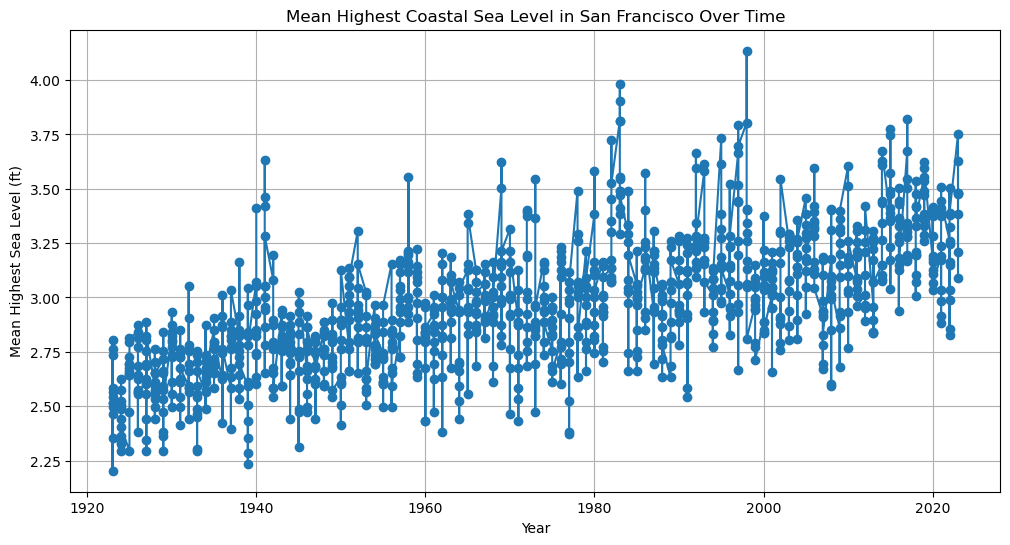

In [51]:
# Filter the data for San Francisco
san_francisco_data = merged_data_new[merged_data_new['City'] == 'San Francisco']

# Extract the year and mean highest columns
sf_years = san_francisco_data['Year']
sf_msl = san_francisco_data['MSL (ft)']

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(sf_years, sf_msl, marker='o', linestyle='-')
plt.title('Mean Highest Coastal Sea Level in San Francisco Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Highest Sea Level (ft)')
plt.grid(True)
plt.show()

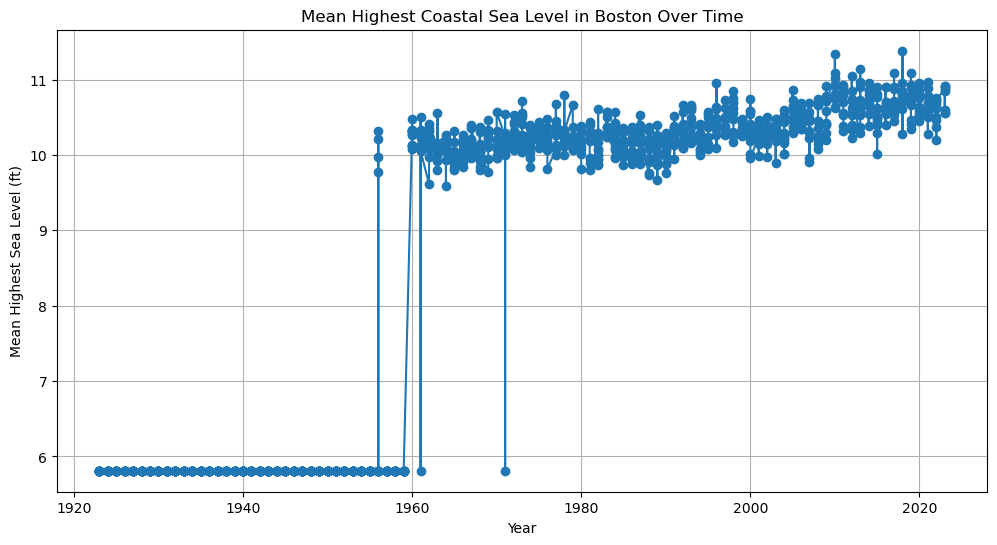

In [50]:
# Filter the data for Boston
boston_data = merged_data_new[merged_data_new['City'] == 'Boston']

# Extract the year and mean highest columns
boston_years = boston_data['Year']
boston_msl = boston_data['Mean Highest']

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(years, mean_highest, marker='o', linestyle='-')
plt.title('Mean Highest Coastal Sea Level in Boston Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Highest Sea Level (ft)')
plt.grid(True)
plt.show()

In [ ]:
# Filter the data for Charleston
charleston_data = reduced_data[reduced_data['City'] == 'Charleston']

# Extract the year and mean highest columns
years = charleston_data['Year']
mean_highest = charleston_data['Mean Highest']

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(years, mean_highest, marker='o', linestyle='-')
plt.title('Mean Highest Coastal Sea Level in Charleston Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Highest Sea Level (ft)')
plt.grid(True)
plt.show()

In [ ]:
# Filter the data for Honolulu
honolulu_data = reduced_data[reduced_data['City'] == 'Honolulu']

# Extract the year and mean highest columns
years = honolulu_data['Year']
mean_highest = honolulu_data['Mean Highest']

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(years, mean_highest, marker='o', linestyle='-')
plt.title('Mean Highest Coastal Sea Level in Honolulu Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Highest Sea Level (ft)')
plt.grid(True)
plt.show()

In [ ]:
# Filter the data for Honolulu
key_west_data = reduced_data[reduced_data['City'] == 'Key West']

# Extract the year and mean highest columns
years = key_west_data['Year']
mean_highest = key_west_data['Mean Highest']

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(years, mean_highest, marker='o', linestyle='-')
plt.title('Mean Highest Coastal Sea Level in Key West Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Highest Sea Level (ft)')
plt.grid(True)
plt.show()

In [ ]:
# Filter the data for San Diego
san_diego_data = reduced_data[reduced_data['City'] == 'San Diego']

# Extract the year and mean highest columns
years = san_diego_data['Year']
mean_highest = san_diego_data['Mean Highest']

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(years, mean_highest, marker='o', linestyle='-')
plt.title('Mean Highest Coastal Sea Level in San Diego Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Highest Sea Level (ft)')
plt.grid(True)
plt.show()

In [ ]:
# Filter the data for San Diego
san_diego_data = reduced_data[reduced_data['City'] == 'San Diego']

# Extract the year and mean highest columns
years = san_diego_data['Year']
mean_highest = san_diego_data['Mean Highest']

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(years, mean_highest, marker='o', linestyle='-')
plt.title('Mean Highest Coastal Sea Level in San Diego Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Highest Sea Level (ft)')
plt.grid(True)
plt.show()